In [34]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import kArmedBandit
from kArmedBandit.agents.EpsilonGreedyAgent import EpsilonGreedyAgent
from kArmedBandit.agents.EpsilonGreedyUCBAgent import EpsilonGreedyUCBAgent

In [35]:

num_runs = 200
num_steps = 1000

epsilons = [0, 0.2, 0.5, 0.8, 1]

TEN_ARMED_FIXED = "TenArmedBanditFixed-v0"
TEN_ARMED_GAUSSIAN = "TenArmedBanditGaussian-v0"

ten_armed_fixed_env = {
    "name": 'TenArmedBanditFixed-v0',
    "env": gym.make("TenArmedBanditFixed-v0"),
    "all_averages": {
        "eps_greedy_agent": []
    }
}

ten_armed_gaussian_env = {
    "name": 'TenArmedBanditFixed-v0',
    "env": gym.make("TenArmedBanditGaussian-v0"),
    "all_averages": {
        "eps_greedy_agent": [],
        "eps_greedy_ucb_agent": []
    }
}

In [36]:

def run_experiment(env, eps):
    print("Epsilon", eps)
    for run in range(num_runs):
        agent = EpsilonGreedyAgent(10, eps)
        score = 0
        averages = []
        obs, reward = (0, 0)
        for i in range(num_steps):
            action = agent.policy(obs, reward)
            obs, reward, _, _ = env.step(action)
            score += reward
            averages.append(score / (i + 1))
    return averages


Epsilon 0
Epsilon 0.2
Epsilon 0.5
Epsilon 0.8
Epsilon 1


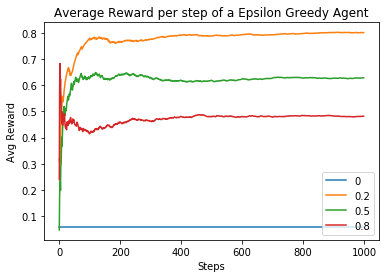

In [37]:
# experiment on ten_armed_fixed_env
for epsilon in epsilons:
    avg = run_experiment(ten_armed_fixed_env["env"], epsilon)
    ten_armed_fixed_env["all_averages"]["eps_greedy_agent"].append(avg)
    # print(sum(avg))
averages = ten_armed_fixed_env["all_averages"]["eps_greedy_agent"]
steps = list(range(num_steps))
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(steps, averages[0], label=str(epsilons[0]))
ax.plot(steps, averages[1], label=str(epsilons[1]))
ax.plot(steps, averages[2], label=str(epsilons[2]))
ax.plot(steps, averages[3], label=str(epsilons[3]))

ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward')  # Add a y-label to the axes.
ax.set_title("Average Reward per step of a Epsilon Greedy Agent")  # Add a title to the axes.
ax.legend()  # Add a legend.